### Clustering

## K-means

In [36]:
# データ準備
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [25]:
# データ準備
# speciesを落とす
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
# 欠損の確認
X.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [27]:
# 標準化
# 距離を使うアルゴリズムは標準化が必要
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# k-means
k = 3
kms = KMeans(n_clusters = k, n_init='auto')
labels = kms.fit_predict(X_scaled)

In [28]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

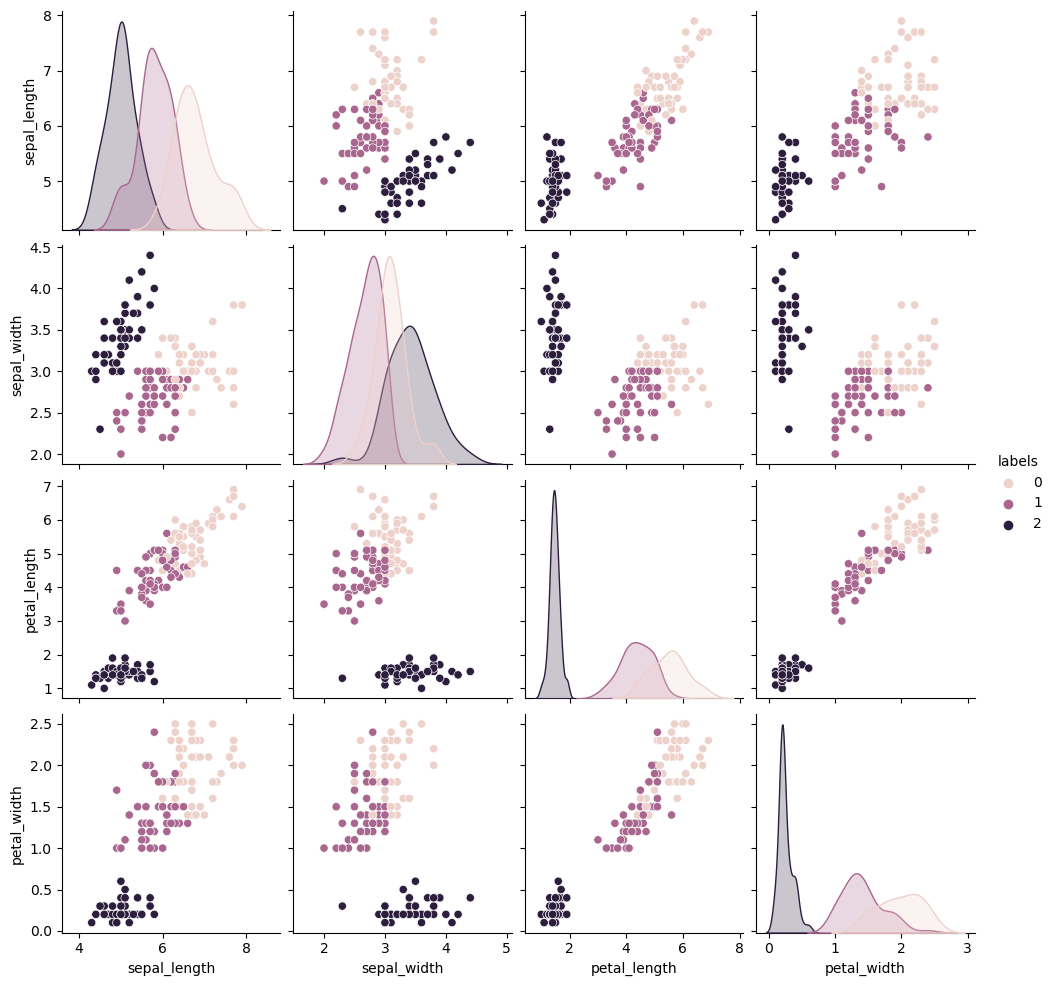

In [29]:
# k-meansで得た分類を元のデータフレームに入れる
X['labels'] = labels
sns.pairplot(X, hue='labels')

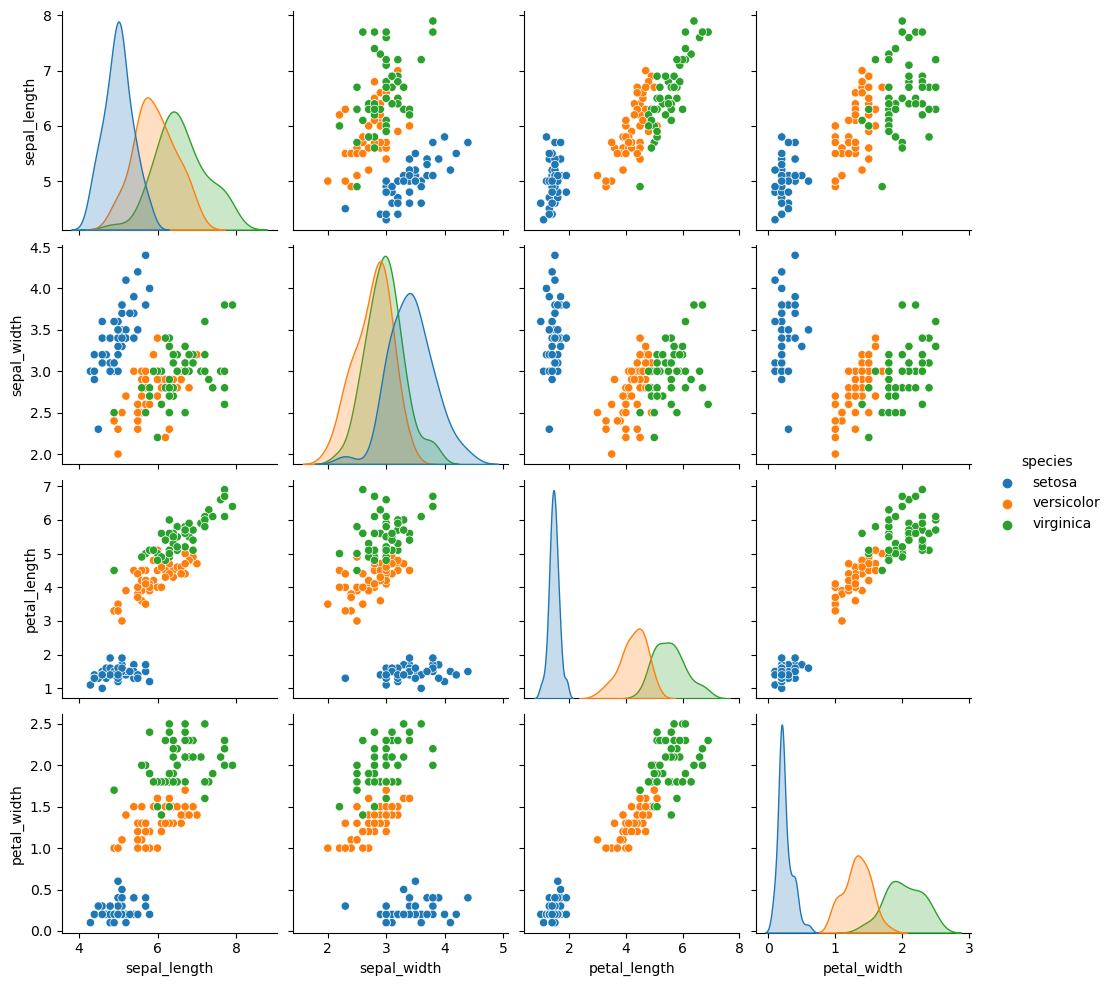

In [30]:
# 教師付きデータの分布（species）
sns.pairplot(df, hue='species')

### 複数のkでの損失

In [33]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [35]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [57]:
# k-meansは質的変数と相性が良くないので量的変数のみでクラスタリングしていく
X = df.select_dtypes(include=np.number)

#標準化
X_scaled = scaler.fit_transform(X)

In [58]:
# kの個数での損失の変化を確認する
losses = []

for k in range(1, 10):
    kms = KMeans(n_clusters=k, n_init='auto')
    kms.fit(X_scaled)
    losses.append(-kms.score(X_scaled))

In [59]:
losses

[377579.99999999994,
 194652.84173558082,
 150274.3914540368,
 127146.98698640466,
 113724.67659127881,
 101115.65900703122,
 92657.673894059,
 88050.37485253818,
 82778.83093444977]

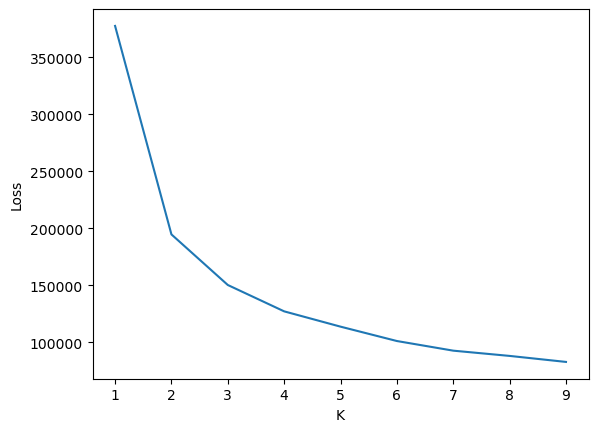

In [60]:
# 損失の描画
# 4-6種類に分類できそう
plt.plot(range(1, 10), losses)
plt.xlabel('K')
plt.ylabel('Loss')
plt.show()

In [61]:
# k-meansによる分類
k=5
kms = KMeans(n_clusters=k, n_init='auto')
labels =  kms.fit_predict(X_scaled)

X['labels'] = labels

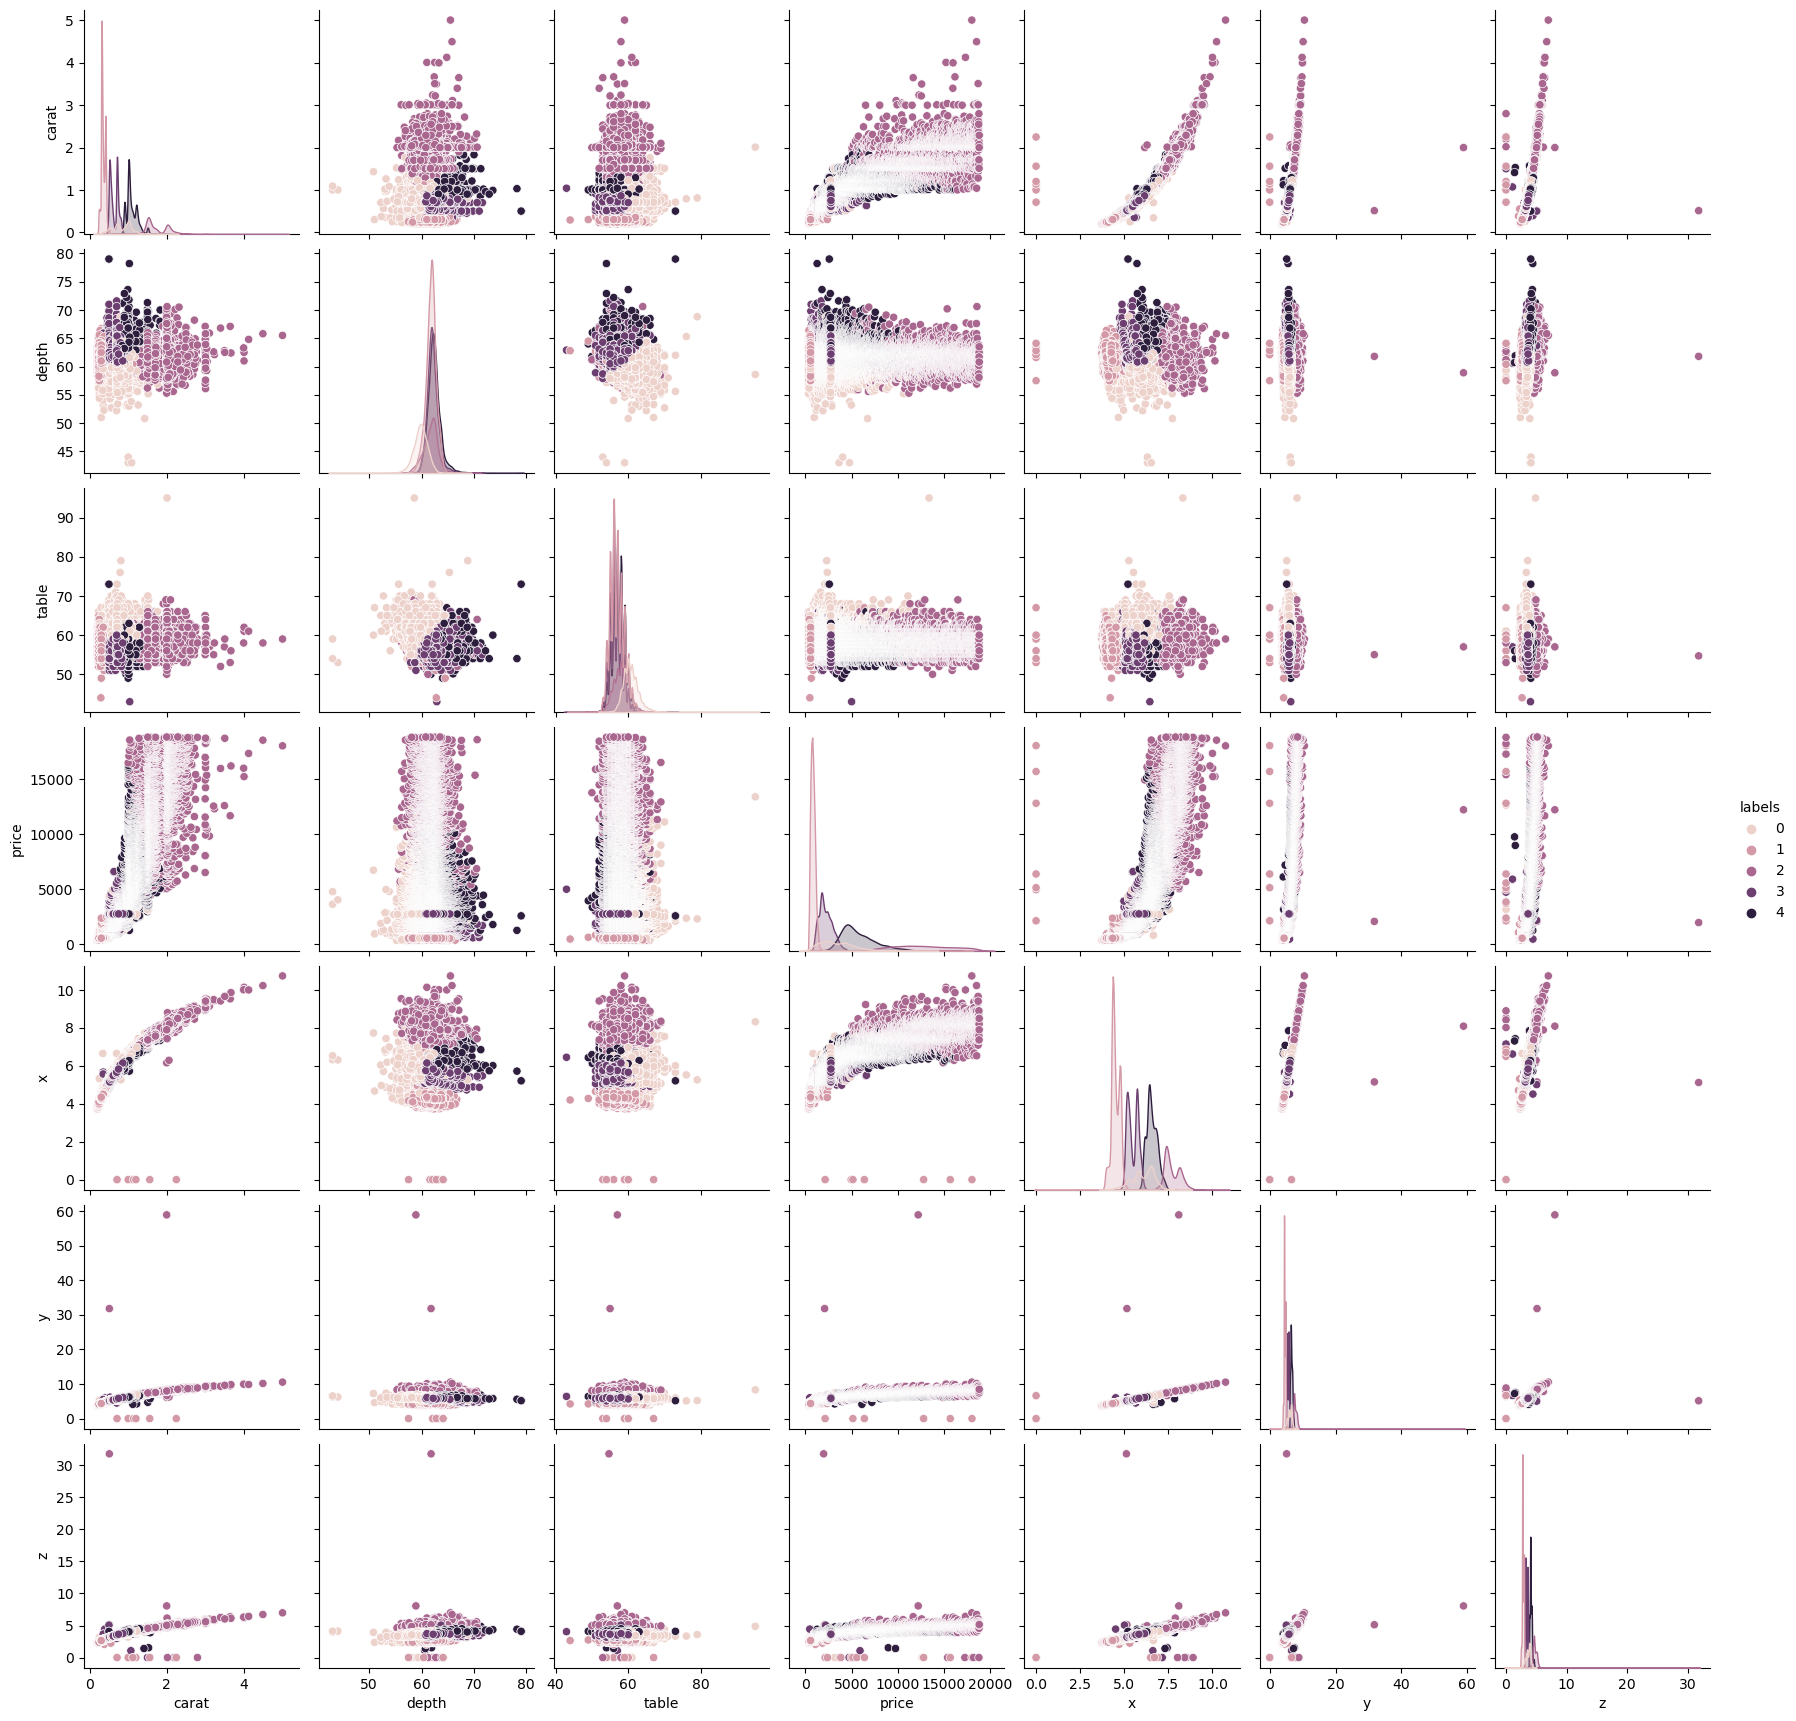

In [63]:
sns.pairplot(X, hue='labels')